## Exploratory Data Analysis
---
### Introduction - Anomalies

Wildfires are uncontrolled fires that spread rapidly through wildland vegetation, posing significant threats to ecosystems, human lives, and property. Analyzing wildfire data is essential for understanding their patterns, predicting their behaviour, and developing effective prevention and management strategies. Exploratory Data Analysis (EDA) plays a vital role in this process by allowing us to uncover hidden insights within fire datasets.

Various aspects of wildfires will be investigated through EDA, such as their frequency, burned areas, geographical distribution, and temporal trends. This exploration helps in identifying anomalies, understanding the basic structure of data, and formulate hypotheses for further analysis.
This initial exploration helps in identifying anomalies, understanding the
When discussing wildfires, it's essential to understand the potential reasons behind their occurrence. These can be broadly categorized into natural causes and human-caused factors:

***Natural Causes of Wildfires***
- **Lightning Strikes**: This is the most common natural cause of wildfires. Both "cold" lightning (short duration, intense current) and "hot" lightning (less voltage but longer duration) can ignite dry vegetation, especially hot lightning.
- **Volcanic Eruptions**: Lava and ash from volcanic activity can generate enough heat to start fires.
- **Spontaneous Combustion**: In rare cases, decomposing organic materials like large piles of dry leaves or compost can generate enough heat to spontaneously ignite.

***Human-Caused Wildfires***

It's important to note that a significant majority of wildland fires are caused by human activities. These can result from accidental negligence or intentional acts:

- **Unattended Campfires**: Campfires that are left unsupervised or not properly extinguished are a leading cause of wildfires.
- **Burning Debris**: Carelessly burning yard waste, agricultural debris, or slash piles can easily lead to uncontrolled fires, especially in hot, dry, or windy conditions.
- **Equipment Use and Malfunctions**: Sparks from vehicles (e.g., hot exhaust pipes, dragging chains), machinery (e.g., chainsaws, grinders), and electrical infrastructure (e.g., downed power lines, faulty cables) can ignite dry vegetation.
- **Discarded Cigarettes**: Negligently discarded cigarettes can easily ignite dry grasses or brush.
- **Fireworks**: The use of fireworks, especially in dry conditions, can easily spark wildfires.

***Beyond specific ignition sources, several environmental factors exacerbate wildfire risk:***
- **Weather Conditions**: High temperatures, low humidity, strong winds, and prolonged droughts create ideal conditions for fires to start and spread rapidly. Wind, in particular, can pre-heat fuels and carry embers, causing spot fires ahead of the main blaze.
- **Climate Change**: A significant contributor to worsening wildfire seasons, climate change leads to hotter, drier conditions, extended fire seasons, and increased frequency and severity of extreme weather events like droughts and lightning storms, making environments more susceptible to burning.

Understanding the complex interactions among human activities, natural phenomena, and environmental conditions could result in better and more effective prevention and management.

---
### Wildfires

Wildfires, as devastating and uncontrolled blazes, represent a critical environmental challenge with far-reaching consequences for ecosystems, human settlements, and even atmospheric composition.
By systematically investigating fire data, we can gain a clearer picture of various aspects, such as:
- **Frequency and Distribution**: How often do wildfires occur, and where are they most prevalent?
- **Burned Areas and Severity**: Analyzing the extent of land consumed by fires helps us understand the scale of destruction and identify areas most vulnerable to severe impacts. This involves examining metrics like the amount of burned area.
- **Temporal Trends**: Are wildfires becoming more frequent or intense over time?

***Dataset***

- **Observation**: This dataset contains recorded wildfires that occurred across Spain from 2001 until 2021, with detailed data about each fire's location, impact and response.
- **Column & Variables**:

| Column Name            | Data Type | Description                                                            |
|------------------------|-----------|------------------------------------------------------------------------|
| `fire_id`              | int64     | Fire Identifier                                                        |
| `burned_area_ha`       | float64   | Forest area burnt in hectares                                          |
| `date`                 | object    | Date of detection of the fire (format yyyy-mm-dd)                      |
| `latitude`             | float64   | Geographical latitude of fire origin                                   |
| `longitude`            | float64   | Geographical longitude of fire origin                                  |
| `region_id`            | int64     | Identifier of the region                                               |
| `province_id`          | int64     | Identifier of the province                                             |
| `municipality_id`      | int64     | Identifier of the municipality                                         |
| `municipality`         | object    | Name of municipality                                                   |
| `cause_id`             | int64     | Identifier of the cause of the fire                                    |
| `deaths`               | int64     | Number of the deaths in the fire                                       |
| `time_to_control_m`    | int64     | Elapsed time to enter fire control phase (in minutes)                  |
| `time_to_extinguish_m` | int64     | elapsed time to extinguish the fire (in minutes)                       |
| `extinction_cost`      | int64     | Extinguishing costs associated with the fire as reported in EGIF       |
| `economic_loss`        | int64     | Economic losses associated with the fire as reported in EGIF (in euro) |

- **Key Features**:
  - ***Geospatial Coverage***: Fires span 50 provinces (e.g., 33 = Asturias, 39 = Cantabria).
  - ***Temporal Coverage***: January to December in the period 2001 - 2021.
  - ***Impact Metrics***: Includes area burned, response times, and costs.
  - ***Cause Analysis***: Differentiates between negligent and intentional causes.
  - ***Sample Data***:

In [2]:
# Read up dataset and show a sample
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("EDA_datasets/cleaned_fires.csv")
df.head()

,fire_id,burned_area_ha,date,latitude,longitude,region_id,province_id,municipality_id,municipality,cause_id,deaths,time_to_control_m,time_to_extinguish_m,extinction_cost,economic_loss
0,2001330001,1.0,2001-01-01,43.316626,-5.534401,5,33,6,BIMENES,4,0,143,170,0,0
1,2001390001,3.0,2001-01-01,43.373667,-3.660194,6,39,28,ENTRAMBASAGUAS,5,0,90,389,60,30
2,2001200001,17.0,2001-01-01,43.220963,-1.973224,1,20,72,URNIETA,4,0,150,175,0,46296
3,2001480009,1.0,2001-01-01,43.333288,-3.109978,1,48,71,MUSKIZ,4,0,75,90,120,0
4,2001330007,10.0,2001-01-02,43.118784,-5.428056,5,33,15,CASO,4,0,208,332,0,0


- **Limitations:**
  - ***Time range***: Only covers the period of 2001 - 2021 (incomplete the last 4 years)
  - ***Cause Granularity***: `cause_id` lacks descriptive labels (not defined types)
- **Correlations**:
  - ***Strongest relationships (Best)***:
1. `time_to_extinguish_m` and `time_to_control_m` **(Correlation: 0.67)**: as the time to control fire increases, the time to extinguish it also leans to increase significantly.
2. `economic_loss` and `burned_area_ha` **(Correlation: 0.39)**: larger burned areas are associated with higher economic losses.
3. `burned_area_ha` and `time_to_extinguish_m` **(Correlation: 0.29)**: larger burned areas leans to take a bit longer to extinguish.
  - ***Weakest relationships (Worst: closes to zero)***:
1. `deaths` and `time_to_control_m` **(Correlation: 0.028)**: there is almost no linear association between the number of deaths and the time to control the fire.
2. `deaths` and `extinction_cost` **(Correlation: 0.014)**: the number of deaths has almost no linear association with the extinction cost.
3. `burned_area_ha` and `extincion_cost` **(Correlation: 0.09)**: the size of the burned area has a minimal linear association with the extinction cost.

***The weak correlations don't mean there's no relationship at all, just that there isn't a strong linear relationship between those specific variables.*** (see the graph below)


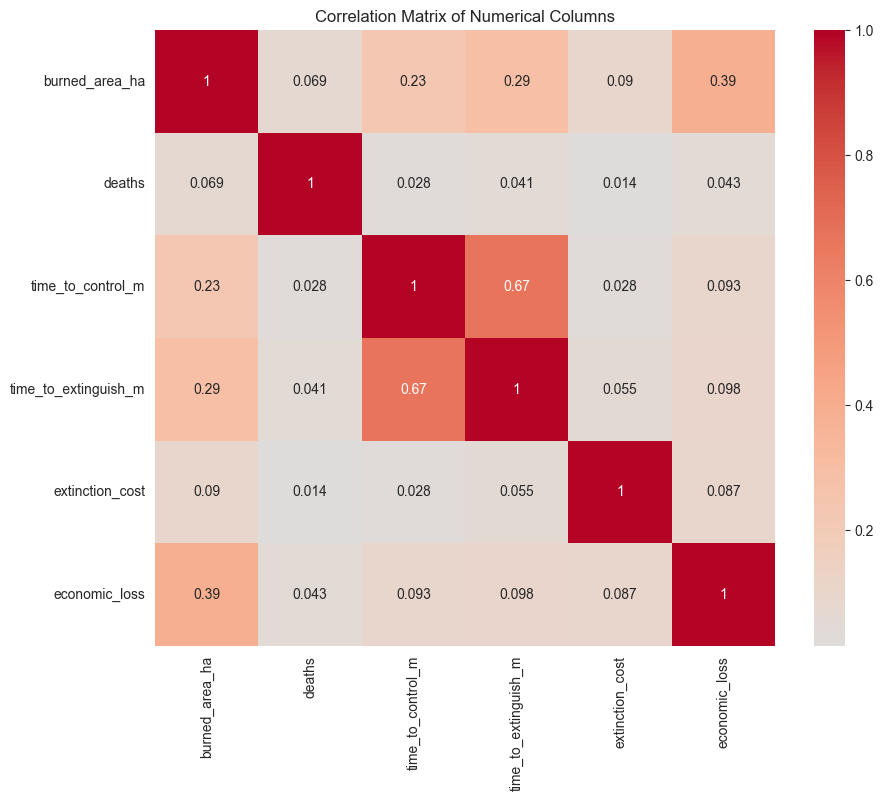

In [3]:
# Correlations of the dataset
# Select numerical columns for correlation analysis
numerical_columns = [
    'burned_area_ha', 'deaths', 'time_to_control_m',
    'time_to_extinguish_m', 'extinction_cost', 'economic_loss'
]

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

### Visualization
**Graph 1: Number of Fires by Provinces**

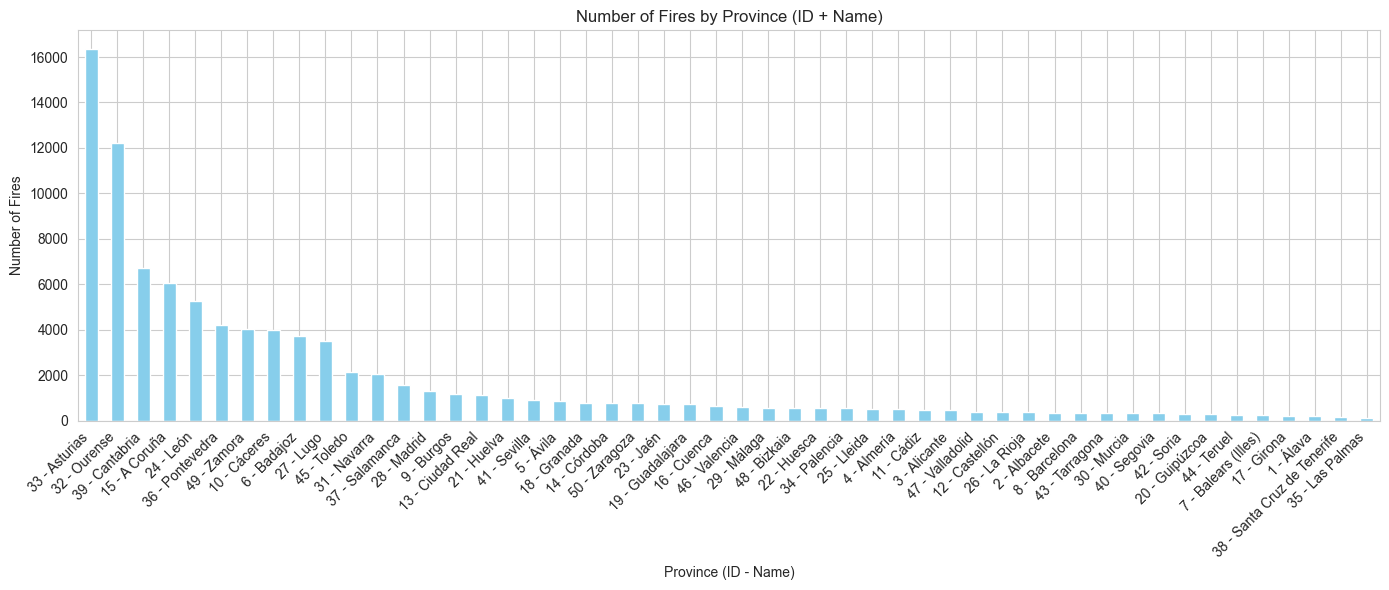

In [4]:
# All provinces ID: https://www.ine.es/daco/daco42/codmun/cod_provincia.htm
province_mapping = {
    1: "Álava", 2: "Albacete", 3: "Alicante", 4: "Almería", 5: "Ávila", 6: "Badajoz", 7: "Balears (Illes)", 8: "Barcelona", 9: "Burgos", 10: "Cáceres", 11: "Cádiz", 12: "Castellón", 13: "Ciudad Real", 14: "Córdoba", 15: "A Coruña", 16: "Cuenca", 17: "Girona", 18: "Granada", 19: "Guadalajara", 20: "Guipúzcoa", 21: "Huelva", 22: "Huesca", 23: "Jaén", 24: "León", 25: "Lleida", 26: "La Rioja", 27: "Lugo", 28: "Madrid", 29: "Málaga", 30: "Murcia", 31: "Navarra", 32: "Ourense", 33: "Asturias", 34: "Palencia", 35: "Las Palmas", 36: "Pontevedra", 37: "Salamanca", 38: "Santa Cruz de Tenerife", 39: "Cantabria", 40: "Segovia", 41: "Sevilla", 42: "Soria", 43: "Tarragona", 44: "Teruel", 45: "Toledo", 46: "Valencia", 47: "Valladolid",
    48: "Bizkaia", 49: "Zamora", 50: "Zaragoza"
}

# Changing the ID column with ID + Name
df["province_name"] = df["province_id"].map(province_mapping)
df["province_id_name"] = df["province_id"].astype(str) + " - " + df["province_name"]

# Group by combined ID + Name
fires_by_province = df["province_id_name"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
fires_by_province.plot(kind='bar', color='skyblue')
plt.title("Number of Fires by Province (ID + Name)")
plt.xlabel("Province (ID - Name)")
plt.ylabel("Number of Fires")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- **Visualization Type**: Bar Plot

- **Axes**:
    - **X-axis**: **Province (ID + Name)**: lists the different provinces recorded in the dataset. Each bar corresponds to a specific province, identified by a numerical ID followed by its name.
    - **Y-axis**: **Number of Fires**: represents the total number of fire incidents recorded in each of the provinces listed on the horizontal axis. The height of the bar corresponds to the count of fires in that particular province.

- **Observations**
    - **Asturias (33) has the Highest Number of Fires:** The tallest bar corresponds to `33 - Asturias`, indicating the province experienced the highest number of fire incidents with a count of over 16,000 fires.
    - **Ourense (32) is Second Highest:** It takes the second-highest bar, indicating that the provinces listed on the left experienced a higher frequency of fires compared to those on the right.
    - **Significant Variation in Fire Counts:** There is a difference in the number of fires across different provinces. Provinces on the right has significantly lower numbers.
    - **Provinces with Very Few Fires:** The bars on the right are very short, indicating some provinces experienced a relatively small number of fire incidents. For example, provinces like `35 - Las Palmas` and `38 - Santa Cruz de Tenerife` appear to have very few recorded (close to 0).

**Graph 2: Number of Fires per Year**

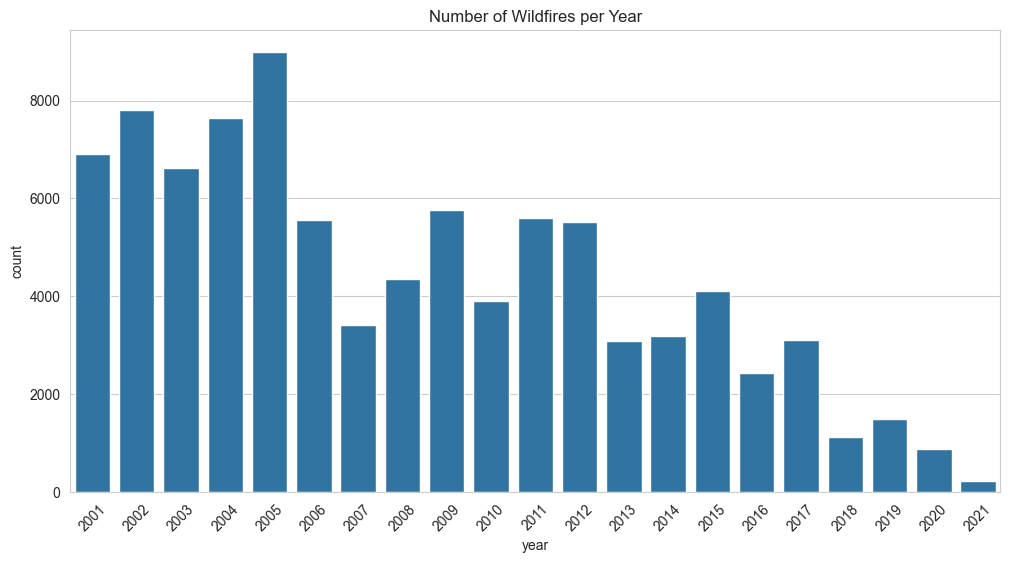

In [5]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Fires per year
plt.figure(figsize=(12,6))
df['year'] = df['date'].dt.year
sns.countplot(x='year', data=df)
plt.title('Number of Wildfires per Year')
plt.xticks(rotation=45)
plt.show()

- **Visualization Type**: Count Plot

- **Axes**:
    - **X-axis**: **Year**
    - **Y-axis**: **Wildfire Count**

- **Observations**
    - **Peak in 2005:** The tallest bar is in 2005, indicating this year had the highest number of fires recorded during the observed period, with a count of ***over 9,000 wildfires***.
    - **High activity in Early 2000s:** The ***period 2001 - 2004** show a relatively high number of wildfires, generally above ***6,000*** fires per year.
    - **Dip in 2007:** There seems to be a significantly lower count that the surrounding years ***(over 2,500 fires)***.
    - **Lower Numbers in Recent Years:** The number of fires appears to be lower in the later years ***(from 2018 to 2021)***, compared to earlier years. ***Year 2020 and 2021 show low counts.***

The spikes between 2001 and 2005 likely resulted from a combination of extreme weather conditions, accumulated fuels (e.g., dry vegetation), and increased human activity—whether accidental or intentional. While the baseline risk was already elevated due to Spain’s naturally warm climate, these specific years were compounded by prolonged droughts and heatwaves, creating ideal conditions for wildfires to ignite and spread.

This emphasizes that while climate change steadily increases the background risk over time, inter-annual variability—such as human behavior, fuel buildup, and weather anomalies—often determines the actual peaks in wildfire activity.

**Graph 3: Number of Wildfires per Month**

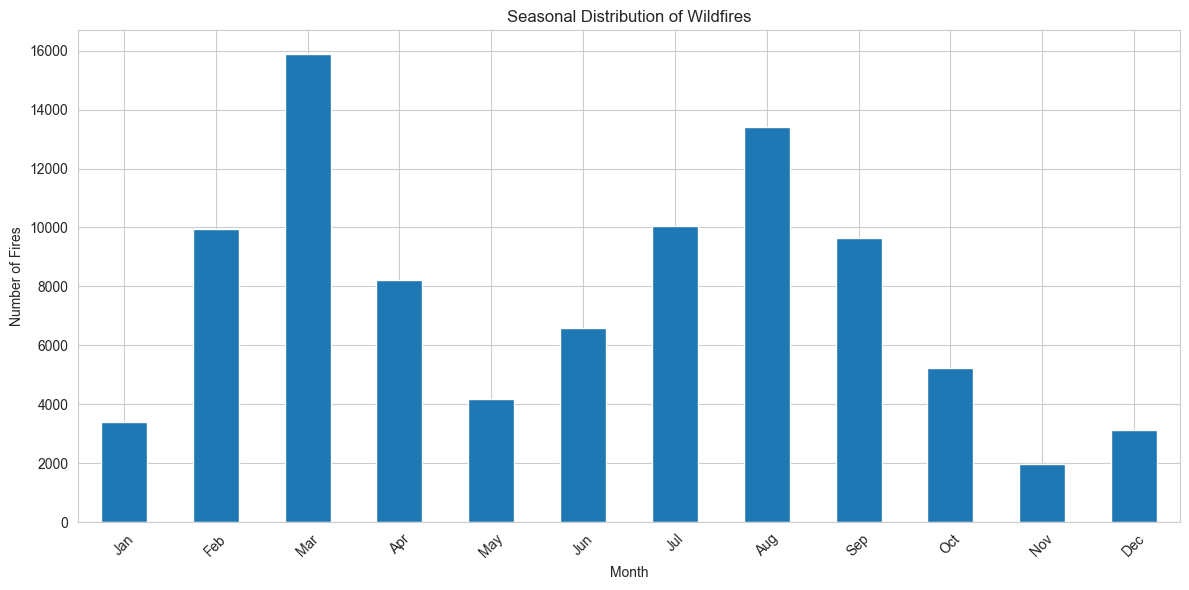

In [6]:
# Rename number to months
months = { 1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

# Update column values
df['month'] = df['date'].dt.month # Transformed based on the month
df["months_name"] = df["month"].map(months)

# Count fires by month and sort by month number
fires_by_month = df["month"].value_counts().sort_index().rename(index=months)

plt.figure(figsize=(12,6))
fires_by_month.plot(kind='bar')
plt.title('Seasonal Distribution of Wildfires')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Visualization Type**: Bar Plot

- **Axes**:
    - **X-axis**: **Month (January-December)**
    - **Y-axis**: **Number of Fires**

- **Observations**
    - **Peak in March:** The tallest bar is in March, indicating this month with the ***highest number of recorded wildfires.***
    - **High Activity in February and August:** ***February and August*** show a significantly high number of wildfires, although not as high as March.
    - **High Activity in July and September:** ***July and September*** also experience a considerable number of fires.
    - **Low Activity in May and June:** They show a noticeable decrease compared to the months surrounding them.
    - **Generally lower Activity in Winter:** ***November, December and January***, show a lower number compared to peak months. ***November has the lowest among all months.***

The strong peak in March and August suggests a strong seasonal pattern in wildfire occurrences. This could be linked to factors such as higher temperatures, drier conditions and increased human outdoor activities. This pattern likely reflects the influence of climate and weather patterns. Further analysis could explore the correlation between temperature, humidity and wind patterns. It could also coincide with the possible increasing human presence in natural areas during the summer and spring peak, potentially leading to more accidental or intentional ignitions.

**Graph 4: Distribution of Fire areas**

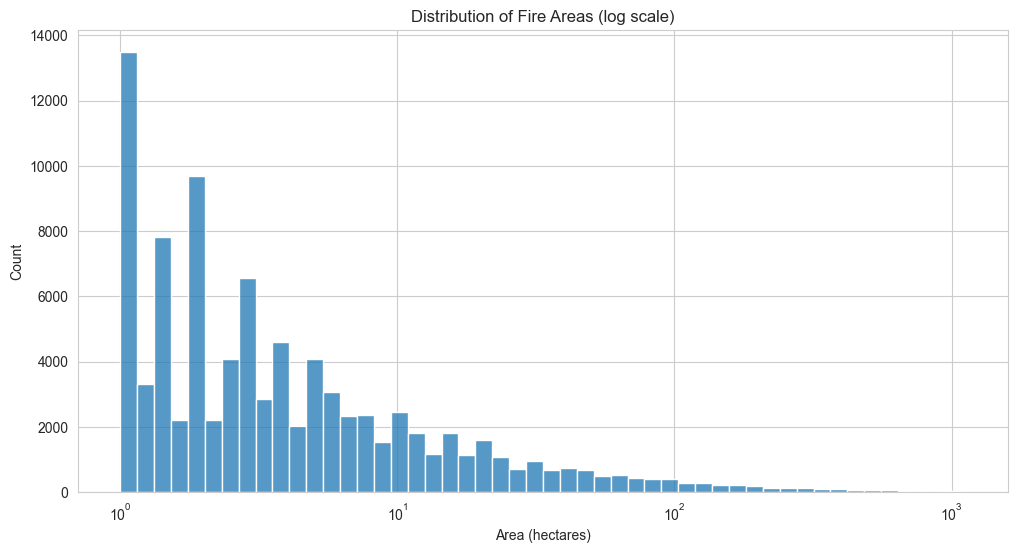

In [7]:
# Area distribution (log scale)
plt.figure(figsize=(12,6))
sns.histplot(df['burned_area_ha'], bins=50, log_scale=True)
plt.title('Distribution of Fire Areas (log scale)')
plt.xlabel('Area (hectares)')
plt.show()


- **Visualization Type**: Histplot

- **Axes**:
    - **X-axis**: **Area (hectares)**: Represents the size of the fire, measured in hectares. Each mark is represented by the power of 10, allowing to visualize data where there's a wide range of values, from very small fires to very large ones, without the smaller values being compressed.
    - **Y-axis**: **Count**: Represents the number of fires that fall within each area range on the horizontal axis. The height of each bar indicates how many fires had an area within that specific range.

- **Observation**
    - The tallest bars are clustered towards the left part of the graph. As the fire area increases, the number of fires in each size category drops. ***It results in many small fires and fewer larger ones.***
    - **Frequency of Small Fires:** The higher bar on the left indicates that fires with areas around 1 hectare or less are the most frequent.
    - **Decreasing Frequency of Small Fires:** Moving to the right, the height of the bars decreases, indicating that larger and larger fires become less common.

**Graph 5: Distribution of Fatalities per Fire**

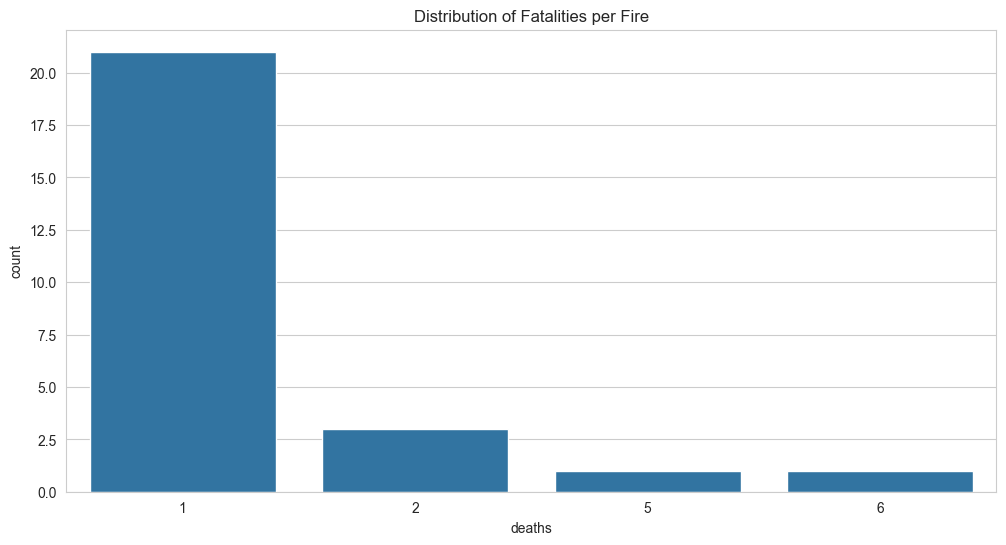

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='deaths', data=df[df['deaths'] > 0])
plt.title('Distribution of Fatalities per Fire')
plt.show()

- **Visualization Type**: Count plot

- **Axes**:
    - **X-axis**: **Deaths**:
    - **Y-axis**: **Count**:

- **Observations**
    - **Common Low Fatality:** The majority of fires resulted in only one fatality. This suggests that fatal fire incidents intend to involve at least a single loss of life.
    - **Rare Multiple Fatality:** The number of fires causing two, five, or six deaths is significantly lower than those causing one death.
    - **Focus on Prevention:** The prevalence of single-fatality fires underscores the importance of prevention measures aimed at avoiding even one death.

Understanding the context of these the circumstances surrounding the fires with multiple fatalities could offer valuable lessons for prevention and response strategies. While this graph focuses on fatalities, understanding the broader impact of fires on human health (including injuries) would be beneficial.

**Graph 6: Top 7 Municipalities by Total Economic Loss**

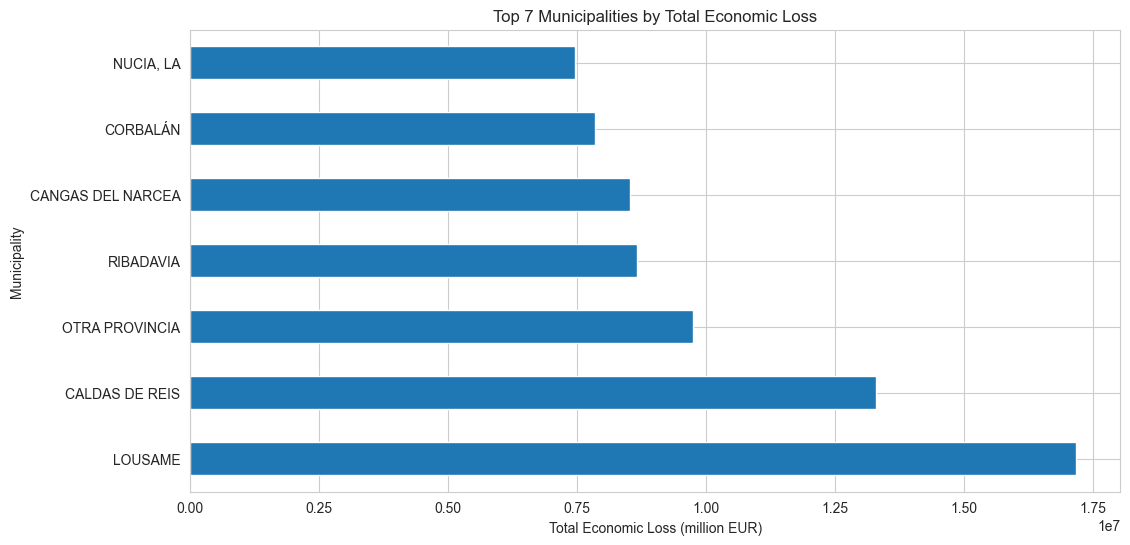

In [9]:
top_municipalities = df.groupby('municipality')['economic_loss'].sum().nlargest(7)

plt.figure(figsize=(12,6))
top_municipalities.plot(kind='barh')
plt.title('Top 7 Municipalities by Total Economic Loss')
plt.xlabel('Total Economic Loss (million EUR)')
plt.ylabel('Municipality')
plt.grid(True)
plt.show()

- **Visualization Type**: Horizontal Bar Plot

- **Axes**:
    - **X-axis**: **Area (hectares)**: Represents the size of the fire, measured in hectares. Each mark is represented by the power of 10, allowing to visualize data where there's a wide range of values, from very small fires to very large ones, without the smaller values being compressed.
    - **Y-axis**: **Count**: Represents the number of fires that fall within each area range on the horizontal axis. The height of each bar indicates how many fires had an area within that specific range.

- **Observation**
    - **Significant Economic Display:** There is a considerable difference in the total economic losses experienced in the top 7 municipalities. ***Lousame suffered higher losses compared to the other municipalities in this group.***
    - **Regional Impact:** The graph highlights a regional patterns in the fire occurrence and the value of assets at risk, making municipalities showcasing greater vulnerability to damaging fires or a history of particularly costly fire incidents.

**Potential Questions**
- Investigating the characteristics of the fires in Lousame could provide valuable insights of why it experienced higher economic losses compared to others.
- What specific measures are in place or could be implemented in these high-loss municipalities to reduce future economic impact from fires?
- Analyzing trends in economic losses per municipality could reveal more details of the impact - was it among the top in terms of economic loss over time?

**Graph 7: Total Extinction cost based on burned areas**

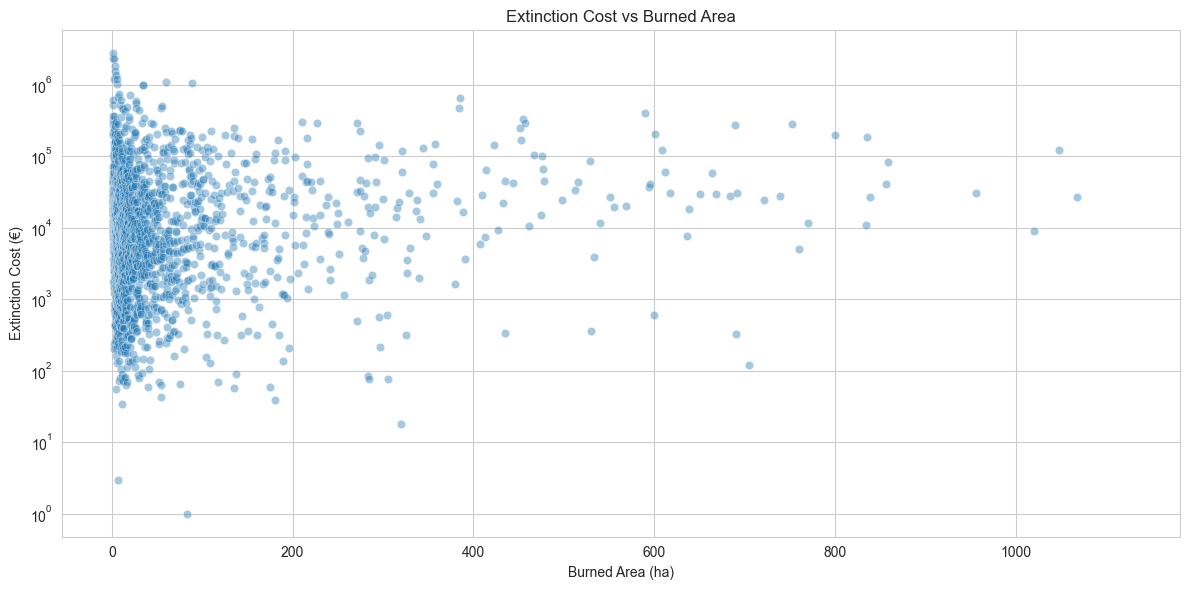

In [10]:
# Group by burned area and sum extinction costs
cost_by_area = (
    df.groupby("burned_area_ha")["extinction_cost"]
    .sum()
    .reset_index()
    .sort_values("burned_area_ha")
)

cost_by_area_sorted = cost_by_area.sort_values("burned_area_ha")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=cost_by_area_sorted, x="burned_area_ha", y="extinction_cost", alpha=0.4)
plt.yscale("log")
plt.title("Extinction Cost vs Burned Area")
plt.xlabel("Burned Area (ha)")
plt.ylabel("Extinction Cost (€)")
plt.tight_layout()
plt.show()

- **Visualization Type**: Scatter Plot

- **Axes**:
    - **X-axis**: **Burned Area (ha)**:  This axis represents the size of each fire, measured in hectares. The values range from approximately 0 to over 1000 hectares.
    - **Y-axis**: **Total Extinction Cost (€)**: This axis represents the total cost associated with extinguishing each fire, measured in Euros. The values range from 0 to over 2.5 million Euros.
- **Blue Scattered Dots**:
Each blue dot represents an individual wildfire incident. Its position indicates the burned area and the corresponding extinction cost for the specific fire.

- ***What could count as Extinction Cost?*** - As a definition, the ***"extinction cost" of wildfires counts the financial, ecological and social repercussions that arise from their occurrence and impact***.

    - example of extinction costs:
        - **Infrastructure damage**: includes damages to homes, businesses and public infrastructures like roads and utilities.
        - **Natural Resources**: wildfires can destroy trees, leading to economic losses for the forestry industry and impacting supply chains.
        - **Fire Suppression Costs**: costs, associated with firefighting efforts, including personnel, equipment, and aerial resources.
        - **Insurance Claims**: wildfires can trigger payouts for property damage.
        - **Evacuation Costs**: costs, associated with relocating residents during wildfires, including temporary housing and support services.
        - **Ecosystem Changes**: the changes can lead to shifts in vegetation communities and the overall structure of ecosystems.

- **Observation**
    - **High-Cost Outliers for Small Fires:** The presence of several points with high extinction costs for small burned areas ***suggests that factors other than just the size of the fire heavily influence the cost.*** These could include the location, type of vegetation, proximity to infrastructure, difficulty of access, or the resources deployed.
    - **Mid-Sized Fires:** For fires with moderate burned areas (e.g., between 10 and 200 hectares), there's a wide range of extinction costs, indicating that different circumstances lead to varying expenditure.
    - **Lower Costs for Many Larger Fires:** Many fires with larger burned areas (beyond a few hundred hectares) have relatively lower extinction costs compared to some of the costly smaller fires. This might suggest different firefighting strategies or that these larger fires occurred in less challenging or less valuable areas.

***In the next graph we will focus on the burned areas under 100 hectares, to see the highest cost in:***

**Graph 8: Extinction Cost by Burned Area (under 100 hectares)**

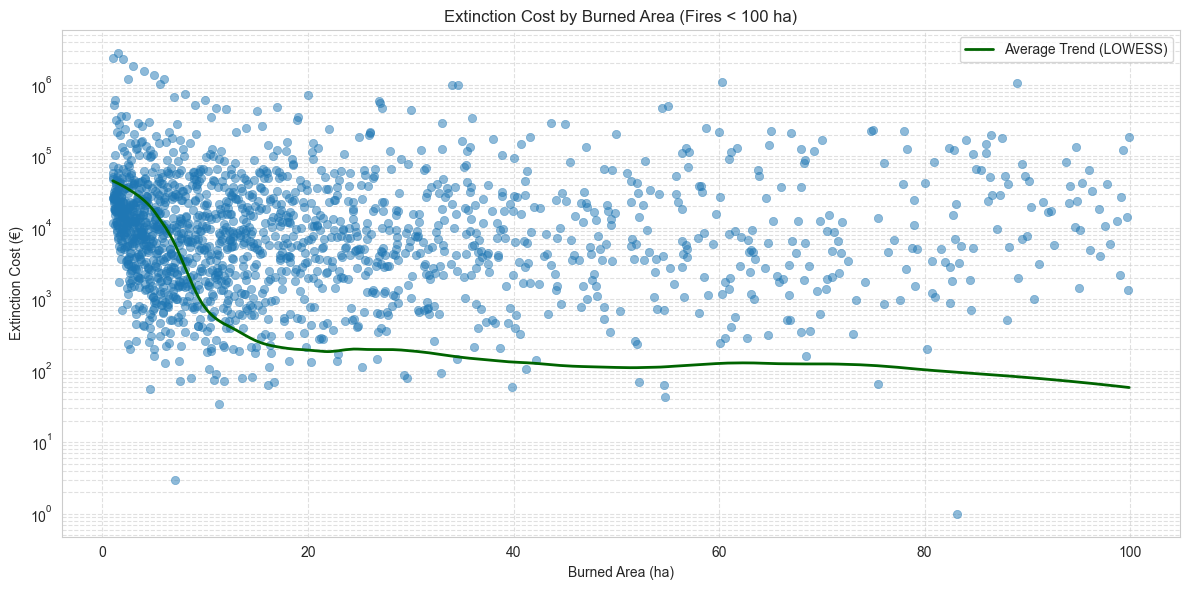

In [21]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Filter to smaller wildfires
filtered = cost_by_area[cost_by_area["burned_area_ha"] < 100]

# Sort the data
filtered = filtered.sort_values("burned_area_ha")

# LOWESS smoothing (for a smooth average trend line)
lowess_avg = lowess(
    filtered["extinction_cost"],
    filtered["burned_area_ha"],
    frac=0.2
)

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=filtered,
    x="burned_area_ha",
    y="extinction_cost",
    alpha=0.5,
    edgecolor=None
)

# Plot the LOWESS average trend
plt.plot(
    lowess_avg[:, 0],
    lowess_avg[:, 1],
    color="darkgreen",
    linewidth=2,
    label="Average Trend (LOWESS)"
)

plt.yscale("log")
plt.title("Extinction Cost by Burned Area (Fires < 100 ha)")
plt.xlabel("Burned Area (ha)")
plt.ylabel("Extinction Cost (€)")
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


- **Visualization Type**: Scatter Plot with LOWESS trend

- **Axes**:
    - **X-axis**: **Burned Area (ha)**:  This axis represents the size of each fire, measured in hectares. The values range from approximately 0 to over 100 hectares.
    - **Y-axis**: **Total Extinction Cost (€)**: This axis represents the cost incurred to extinguish the fire, in euros.
This means that the distance between 1 and 10 is the same as the distance between 10 and 100, or 100 and 1000, and so on.

- **Blue Scattered Dots**:
Each blue dot represents an individual wildfire incident. Its position indicates the burned area and the corresponding extinction cost for the specific fire.
The density of the dots suggests that there are many more fires in the smaller burned area categories.
- **Green Line: Average Trend (LOWESS):**
The green line represents the Locally Weighted Scatterplot Smoothing (LOWESS) trend. LOWESS is a non-parametric regression method, used to provide a smoothed curve to show the general trend in the data, without assuming a specific mathematical model.
***The line indicates the average extinction cost for a given burned data.***

- **Observation**
    - **High Cost for Small fires**: the average trend line starts at very high for very small burned areas. This suggests the initial response and containment costs for fires, even if quickly extinguished, can be significant.
    - **Decreasing Average Cost with Increasing Burned Area**: As the burned area increases from 0 to approximately 20-30 hectares, the average extinction cost (green line) sharply decreases. This might seem counterintuitive, but it could indicate that:
        - Many very small fires might require a rapid, resource-intensive initial attack to prevent them from spreading, leading to high costs per unit area.
        - Once a fire has grown to a certain size, the incremental cost to fight it might not increase proportionally, or perhaps some very small fires are simply difficult and costly to access and extinguish.
        - Alternatively, it could be that many fires that are very rapidly extinguished (and thus have small burned areas) still incur the fixed costs of mobilizing firefighting resources.
    - **Slightly Decreasing Average Cost for Larger Fires**: Over 30 hectares, the trend continues to decrease, but at a much slower rate and maintains stable until showing a decline around 100 hectares.
    - **Wide Variability in Costs**: The scatter of the blue dots shows significant variability in extinction costs for fires of similar sizes. For example, a fire of 10 hectares could cost anywhere from less than €100 to over €10,000. This variability could be due to factors not captured in this graph, such as terrain, accessibility, weather conditions, proximity to infrastructure, type of vegetation, and resource availability at the time of the fire.

***As viewed the graphs before, two questions comes to mind:***

1. ***What are the specific factors that lead to very high extinction costs for relatively small fires?***
Small fires can give high extinction costs when they occur near populated areas or critical infrastructure, requiring rapid deployment of expensive aerial suppression and intensive manpower to prevent escalation.
2. ***Why do some large fires have lower extinction costs than some smaller ones?***
One of the reasons could be not in terms of the area burned, but in terms of the impact on species and ecosystems over time. Frequent, smaller fires can lead to more significant shifts in species distribution. **Examples:**
- **Habitat Isolation**: Smaller fires can create patches of burned areas, which makes it harder for species to move between areas and access resources, potentially leading to decrease of population size.
- **Impact on Vulnerable Species**: Small and frequent fires can damage species with limited habitat ranges or those that are already endangered.
- **Long-term Impacts**: While large fires cause more dramatic impact, small fires can have more gradual effect on species and ecosystems over time. This could lead to significant changes in ecological stability.

**Occurring problems**: In the future (next steps) a few changes could be done or included into the dataset:

- Get more information regarding the costs - What do they include? Are they focusing more on ecosystem costs or infrastructure and fire suppression costs?
- Deeper research in the burned areas consequences - Have the wildfires affected air quality? Have the wildfires affected only vegetation or people as well? In what aspect has wildfire led to such high costs - is the reason, intensity and location one of the main reasons for occurrence?

### Wildfires - Conclusion

Wildfire data shows that most fires are relatively small, typically covering less than 10 hectares, and fortunately, few result in fatalities. However, these incidents still pose significant threats, with some municipalities facing considerable economic losses. The costs associated with extinguishing fires are complex and influenced by factors beyond just the size of the burned area, suggesting that terrain and accessibility to infrastructure play critical roles.

Furthermore, wildfire occurrences exhibit distinct seasonal and geographical patterns, with activity peaking in March, July, and August. Certain provinces, such as Asturias and Ourense, experience a higher number of fires. While the annual number of wildfires has varied over the years, the data indicates a decline in recent years, suggesting a potential change in fire frequency.

In the next phase of the investigation, we will focus on identifying the specific weather conditions, beyond just temperature, that may serve as catalysts for wildfires to ignite and spread. By examining factors such as temperature and precipitation patterns, we aim to uncover the relationships that ultimately determine the likelihood of wildfire outbreaks.

---
### Introduction - Possibilities

Weather plays a crucial role in shaping our environment, and its intricate relationship with wildfires is particularly important.

To fully understand the dynamics of wildfires, we need to explore a wide range of weather conditions. Our upcoming analysis will examine a weather dataset to uncover the specific influence of various meteorological factors, including patterns of precipitation (or the absence of it) and other atmospheric variables. By closely investigating these parameters, we aim to gain extended insights into how weather acts as a key determinant in the occurrence and behaviour of these devastating natural events.

### Weather

By carefully examining the weather dataset, we aim to gain a clearer understanding of various aspects, including:
- **Temperature's Impact**: What are the average, minimum, and maximum daily temperatures immediately preceding wildfire incidents? Are there specific temperature thresholds above which the probability of a wildfire significantly increases?
- **Precipitation Mitigating**: How long do dry spells (periods without significant rainfall) typically persist before a wildfire occurs, and at what point does the risk become critical?
- **Meteorological Effects**: What precise combination of high temperatures and low precipitation creates the most hazardous conditions for wildfire initiation?

***Dataset***

- **Observation**: A daily weather dataset, containing geographical details and temperature/precipitation readings from stations to unveil local climatic patterns and anomalies.
- **Column & Variables**:

| Column Name            | Data Type | Description                                                                                 |
|------------------------|-----------|---------------------------------------------------------------------------------------------|
| `STATION`              | object    | Unique identifier for the weather station                                                   |
| `NAME`                 | object    | Name of the weather station                                                                 |
| `LATITUDE`             | float64   | Geographical latitude                                                                       |
| `LONGITUDE`            | float64   | Geographical longitude                                                                      |
| `ELEVATION`            | float64   | The altitude or height of the weather station above sea level, typically measured in meters |
| `DATE`                 | object    | Date of recorded observations (format yyyy-mm-dd)                                           |
| `PRCP`                 | float64   | Precipitation amount for the day (in millimeters)                                           |
| `TAVG`                 | float64   | Average temperature for the day (in celsius)                                                |
| `TMAX`                 | float64   | Maximum temperature for the day (in celsius)                                                |
| `TMIN`                 | float64   | Minimum temperature for the day (in celsius)                                                |

- **Key Features**:
  - ***Geospatial Specificity:*** Data is tied to different stations with precise latitude, longitude and elevation
  - ***Daily Granularity:*** Observations are recorded on a daily basis
  - ***Quantitative Measurements:*** All-weather related columns are numerical, allowing for easier analysis and visualization.
  - ***Sample Data***:

In [12]:
# Read dataset and show sample
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_weather = pd.read_csv("EDA_datasets/cleaned_weather_data_2001-2021.csv")
df_weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,SPE00119792,"ASTURIAS AVILES, SP",43.5667,-6.0442,127.0,2001-01-01,0.0,14.1,18.6,9.0
1,SPE00119792,"ASTURIAS AVILES, SP",43.5667,-6.0442,127.0,2001-01-02,1.2,11.3,13.5,9.5
2,SPE00119792,"ASTURIAS AVILES, SP",43.5667,-6.0442,127.0,2001-01-03,6.5,10.9,14.0,7.0
3,SPE00119792,"ASTURIAS AVILES, SP",43.5667,-6.0442,127.0,2001-01-04,5.4,14.6,18.2,10.4
4,SPE00119792,"ASTURIAS AVILES, SP",43.5667,-6.0442,127.0,2001-01-05,5.6,14.0,20.0,8.8


- **Limitations:**
  - ***Time range***: Only covers the period of 2001 - 2021 (incomplete the last 4 years).
  - ***Humidity and Wind Values***: Currently, the dataset does not have humidity and wind, but in the future, they could be implemented.
- **Correlations**:
  - ***Strongest relationships (Best)***:
1. `TMAX` and `TAVG` **(Correlation: 0.96)**
2. `TAVG` and `TMIN` **(Correlation: 0.94)**
3. `TMAX` and `TMIN` **(Correlation: 0.84)**
   - ***Weakest relationships (Worst: closes to zero)***:
1. `PRCP` and `TMIN` **(Correlation: -0.057)**
2. `ELEVATION` and `TMIN` **(Correlation: -0.46)**
3. `ELEVATION` and `TMAX` **(Correlation: -0.41)**

***The weak correlations don't mean there's no relationship at all, just that there isn't a strong linear relationship between those specific variables.*** (see the graph below)


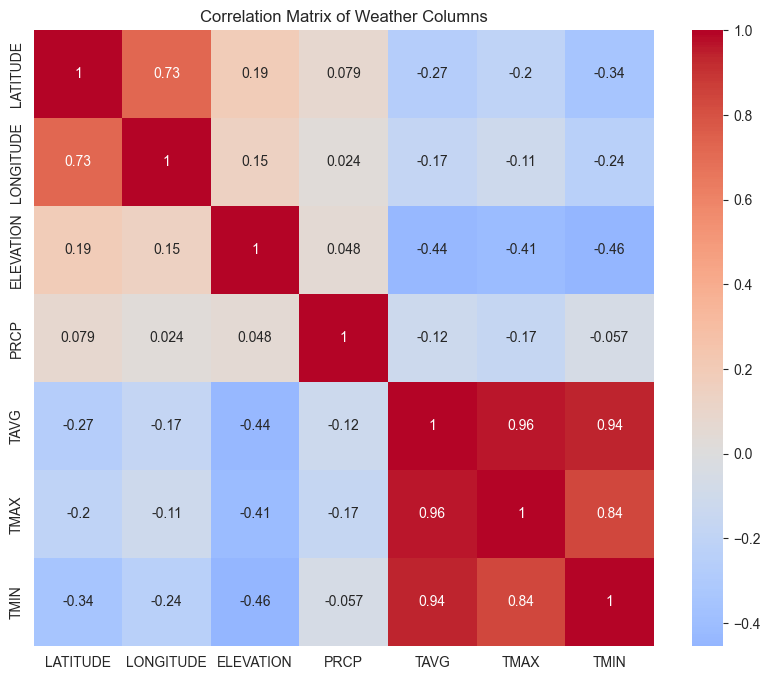

In [13]:
# Select numerical columns for correlation analysis
weather_columns = ['LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP', 'TAVG', 'TMAX', 'TMIN']

# Calculate the correlation matrix
correlation_matrix = df_weather[weather_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Weather Columns')
plt.show()

### Visualization
**Graph 9: Average Temperature Trend Through the Years**

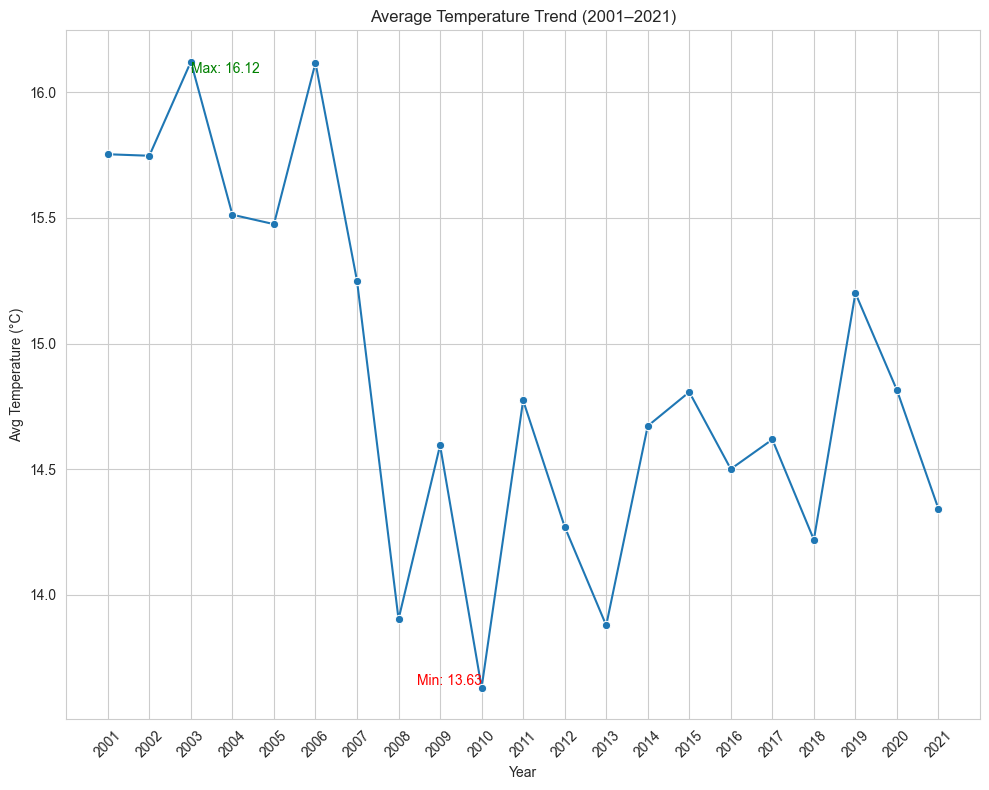

In [14]:
 # Convert DATE column to datetime
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])
# Create a 'Year' column for yearly trends
df_weather['Year'] = df_weather['DATE'].dt.year

yearly_avg_temp = df_weather.groupby('Year')['TAVG'].mean()

# Identify min/max for annotation
min_year = yearly_avg_temp.idxmin()
max_year = yearly_avg_temp.idxmax()

# Retry plotting with formatted x-axis ticks as integers
plt.figure(figsize=(10, 8))
sns.lineplot(x=yearly_avg_temp.index, y=yearly_avg_temp.values, marker="o")

# Annotate min and max
plt.text(min_year, yearly_avg_temp[min_year], f"Min: {yearly_avg_temp[min_year]:.2f}", color="red", ha="right", va="bottom")
plt.text(max_year, yearly_avg_temp[max_year], f"Max: {yearly_avg_temp[max_year]:.2f}", color="green", ha="left", va="top")

plt.title("Average Temperature Trend (2001–2021)")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.xticks(ticks=yearly_avg_temp.index, labels=yearly_avg_temp.index.astype(int), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Visualization Type**: Line Plot

- **Axes**:
    - **X-axis**: **Year** (ranging from 2001 to 2021)
    - **Y-axis**: **Avg Temperature** (in Celsius)

- **Observations**
    - **Overall Trend**: Temperature varies significantly from year to year. There isn't a consistent increasing or decreasing linear trend over the entire period.
    - **Maximum Temperature**: Highest average temperature recorded is 16.12 °C, which occurred in 2003.
    - **Minimum Temperature**: The lowest average temperature recorded is 13.63 °C, which occurred in 2009.
    - **Peaks:** High peaks are observed around 2003 (16.12 °C) and 2006 (approximately a bit over 16.0 °C). Another relatively high peak is in 2019 (over 15.0 °C).
    - **Recent Years (2018-2021)**: After a dip in 2018, there's a significant increase in 2019, a slight decrease in 2020 and a decrease in 2021.

The early years of the dataset show that average temperatures were significantly higher than those recorded more recently. This trend may be linked to several factors, including long-term climate trends or the effects of climate change mitigation efforts. Understanding this pattern provides better insight into the reasons for the high number of wildfires in the first decade, suggesting it could be one of the primary causes of wildfire occurrences during that time.

**Graph 10: Average Precipitation Trend through the years**

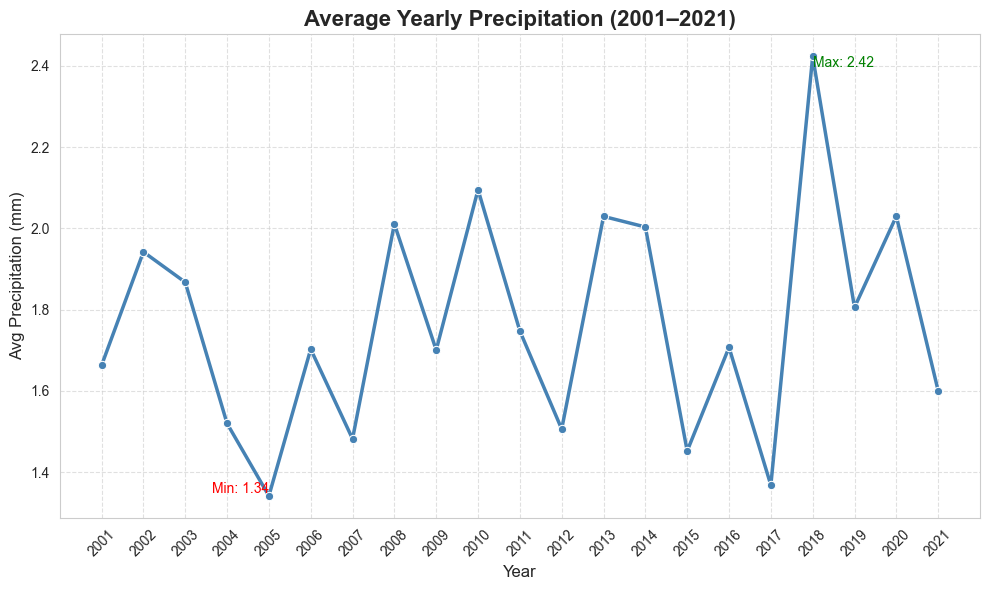

In [15]:
# Group precipitation by year
yearly_prcp = df_weather.groupby('Year')['PRCP'].mean()

# Identify min/max for annotation
min_year = yearly_prcp.idxmin()
max_year = yearly_prcp.idxmax()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_prcp.index, y=yearly_prcp.values, marker='o', color='steelblue', linewidth=2.5)

# Annotate min and max
plt.text(min_year, yearly_prcp[min_year], f"Min: {yearly_prcp[min_year]:.2f}", color="red", ha="right", va="bottom")
plt.text(max_year, yearly_prcp[max_year], f"Max: {yearly_prcp[max_year]:.2f}", color="green", ha="left", va="top")

# Titles and labels
plt.title("Average Yearly Precipitation (2001–2021)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Avg Precipitation (mm)", fontsize=12)
plt.xticks(ticks=yearly_prcp.index, labels=yearly_prcp.index.astype(int), rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- **Visualization Type**: Line Plot

- **Axes**:
    - **X-axis**: **Year** (ranging from 2001 to 2021)
    - **Y-axis**: **Avg Precipitation**: (in millimeters)

- **Observations**
    - **Overall Trend**: Precipitation varies significantly from year to year. There isn't a consistent increasing or decreasing linear trend over the entire period.
    - **Maximum Precipitation**: The highest average precipitation recorded is 2.42 mm in 2018.
    - **Minimum Temperature**: The lowest average precipitation recorded is 1.34 mm, which occurred in 2005.
    - **Peaks:** The second and third-highest peaks are in 2010 (approximately 2.1 mm) and two years after the highest (recorded in 2020 - a bit over 2.0 mm).
    - **Recent Years (2018-2021)**: After reaching the highest point, there was a dip in 2019, which slightly increased a year later before experiencing another dip in 2021, totalling 1.6 mm.

Over the last four years, the average precipitation has fluctuated, with both increases and decreases. This variation allows the ground to absorb more water, making it more resistant to catching or starting fires.
The wildfire dataset suggests that one of the main reasons for the increase in wildfires during the first decade is the combination of high temperatures and low precipitation. This results in drier ground, which can easily catch fire.

**Graph 11: Distribution of the average temperatures**

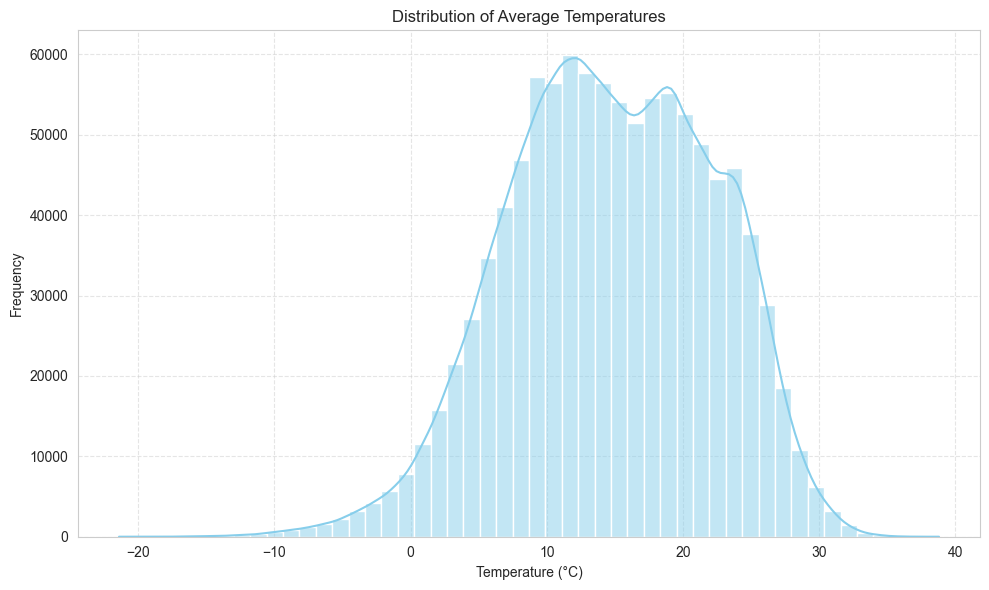

In [16]:
# Drop missing values
temps = df_weather['TAVG'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(temps, bins=50, kde=True, color="skyblue")

# Labels and title
plt.title("Distribution of Average Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

- **Visualization Type**: Histplot

- **Axes**:
    - **X-axis**: **Temperature** (in Celsius)
    - **Y-axis**: **Frequency** (number of times a particular average of temperature has occurred)

- **Observations**

- **Distant Peaks:** there are two common ranges of average temperatures that occur with high frequency:
   - **First peak** appears to be around 12-14 °C.
   - **Second peak** is around 19-21 °C.
- **Range of Temperatures:** the distribution is not symmetrical. It has a bigger tail towards the lower temperatures and shorter second tail towards the higher temperatures.
- **Frequency:** The higher frequency (50,000) is observed around two peaks. They seem to drop after moving away from the central peaks.

**Graph 12: Distribution of the average temperatures every month**

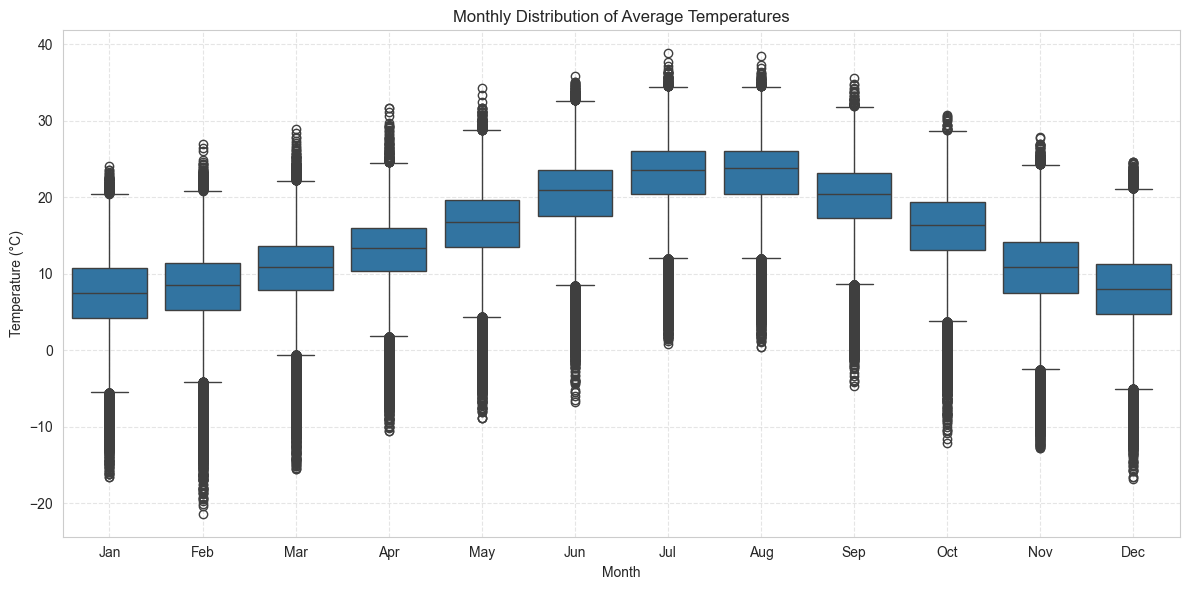

In [17]:
# Add month names
import calendar

df_weather['Month'] = df_weather['DATE'].dt.month
df_weather['MonthName'] = df_weather['Month'].apply(lambda x: calendar.month_abbr[x])

# Plot boxplot of average temperatures per month
plt.figure(figsize=(12, 6))
sns.boxplot(x='MonthName', y='TAVG', data=df_weather, order=calendar.month_abbr[1:])  # Jan–Dec
plt.title("Monthly Distribution of Average Temperatures")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- **Visualization Type**: Box plot

- **Axes**:
    - **X-axis**: **Month** (from Jan to Dec)
    - **Y-axis**: **Temperature**: (in Celsius)

- **Observations**
    - ***Key Observations (BoxPlot View):***
        - **Median (Middle line of the Box):** Represent the average temperature for every month.
        - **Interquartile Range (IQR - the Box):** shows the middle 50% of the temperature data for the month. The bigger the box means more variability in temperatures for that month.
        - **Whiskers (Lines extending from the Box):** Extends to at least 1.5 times the box from the quartiles, showing the range of data excluding outliers.
        - **Outliers (Individual Points beyond Whiskers):** Represent unusually high or low average temperatures for that specific month.

Temperatures are lowest in winter (Dec, Jan, Feb), gradually rise through spring (Mar, Apr, May), show their peak in summer (Jun, Jul, Aug) and gradually decrease through autumn (Sep, Oct, Nov).

- **Winter months:** Jan and Feb have the lowest median temperatures, suggesting they are typically the coldest months.
- **Spring months:** Temperatures steadily rise. The median temperature of May is higher than March, showing a clear transition.
- **Summer months:**
    - **Highest Medians:** Jul and Aug consistently show the highest median temperatures, indicating they are typically the warmest months.
    - **Relatively Stable Medians** The median temperatures for these three months are quite similar, suggesting a sustained warm period.
    - **High Outliers:** Several high outlier points are present, especially in July and August, indicating instances of unusually hot average monthly temperatures.
- **Autumn months:** Temperatures slowly decrease, despite September showing relatively warm temperatures. In November, we start to see more winter values.

Months with extreme temperatures (winter and summer) tend to show a wider range of values, including more distinct outliers, reflecting greater variability in average temperatures during these periods. The transition months (spring and autumn) also exhibit significant ranges.

**Graph 13: Distribution of the maximum temperature every month**

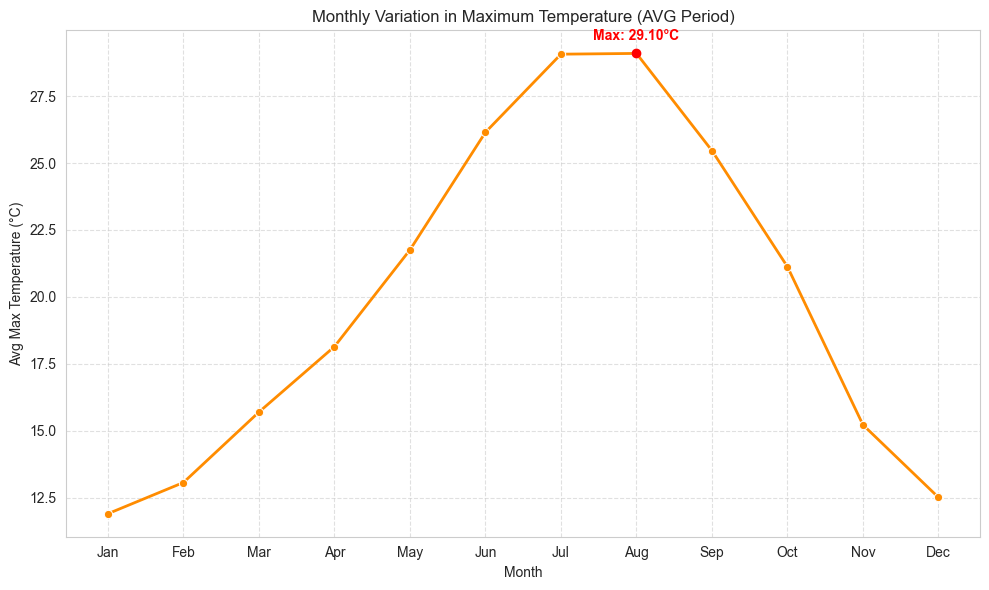

In [18]:
# Group by month for average TMAX
monthly_tmax = df_weather.groupby('Month')['TMAX'].mean()

# Get the month with the highest average TMAX
max_month = monthly_tmax.idxmax()
max_value = monthly_tmax.max()

# Convert month numbers to names for labels
month_names = [calendar.month_abbr[m] for m in monthly_tmax.index]

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_tmax.index, y=monthly_tmax.values, marker='o', linewidth=2, color='darkorange')

# Highlight the max point
plt.scatter(max_month, max_value, color='red', zorder=5)
plt.text(max_month, max_value + 0.5, f"Max: {max_value:.2f}°C", ha='center', color='red', fontweight='bold')

# Apply month names
plt.xticks(ticks=monthly_tmax.index, labels=month_names)

plt.title("Monthly Variation in Maximum Temperature (AVG Period)")
plt.xlabel("Month")
plt.ylabel("Avg Max Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- **Visualization Type**: Line Plot

- **Axes**:
    - **X-axis**: **Month** (from Jan to Dec)
    - **Y-axis**: **AVG Temperature**: (in Celsius)

- **Observations**
    - **Winter:** January has the lowest average maximum temperature, just above 12.5 °C. February shows a slight increase from January.
    - **Spring:** From March to June, there's a steady and significant increase in the average maximum temperatures. April sees temperatures rise to around 18 °C. May crosses the 20 °C mark, while June approaches 26 °C.
    - **Summer:** The highest average maximum temperature is 29.10 °C, occurring in August. July also shows a very high average maximum temperature, very close to the peak, indicating a sustained period of warmth in mid-summer.
- **Autumn:** From September to December, there's a consistent decrease in the average maximum temperatures. September is still relatively warm, above 25 °C. October drops to around 21 °C. November sees a more significant drop, and December returns to the lowest range.

***August is, on average, the month with the highest maximum temperatures over the analyzed period.***

### Weather - Conclusion

Analyzing climate data from 2001 to 2021 reveals significant year-to-year fluctuations in both average temperatures and yearly precipitation, rather than a clear long-term trend. Average temperatures ranged from a low of 13.63°C in 2008 to a high of 16.12°C in 2004, indicating considerable variability over the two decades. Similarly, average yearly precipitation has shown substantial shifts, with a minimum of 1.34 mm in 2004 and a maximum of 2.42 mm in 2018, further highlighting the absence of a consistent upward or downward pattern.

The distribution of average temperatures exhibits a bimodal characteristic, suggesting the presence of two dominant temperature ranges or seasons. This bimodal pattern, with peaks indicating more frequent occurrences of temperatures within specific cool and warm ranges (approximately between 5°C and 25°C), reflects the nature of temperature changes throughout the year. In essence, the region's climate over this period is marked by distinct seasonal shifts and notable year-to-year variability in both temperature and precipitation.

---
### Conclusion

The analysis of wildfire and weather data shows a strong link between climate and wildfire activity. There are two main temperature peaks during the year, indicating clear warm and cool seasons. Wildfires often occur most in the warm months of July and August, with some activity in March. Higher temperatures and drier conditions lead to more wildfires, especially when there’s less rainfall, which dries out vegetation and makes it easier for fires to start.

The changes in temperature and rainfall directly affect the patterns of wildfires each season and from year to year. Warm and dry periods make vegetation more flammable, leading to more fires, especially in certain areas and seasons. On the other hand, more rain can reduce fire activity by keeping fuels moist. While most wildfires are small, they can have significant economic and environmental impacts, highlighting the importance of specific weather conditions on wildfire risk.

**Next Steps**
- Test different models, who can work well together with the dataset (ex. a predictive model, such as a regression or ensemble method)
- Select and visualize to reveal geographic and seasonal patterns in fire costs, which would provide qualitative context, deepening the understanding and support evidence for future work.
